# Employee Churn Analysis

# What is Employee Churn ?
When an employee leaves the organization is known as churn. 
Employee churn will be affected by age, tenure, pay, job satisfaction, salary, working conditions, growth potential 
and employee’s perceptions of fairness. 
Some other variables such as age, gender, ethnicity, education, and marital status, were essential factors 
in the prediction of employee churn. 
Predicting the employee churn will help some proactive measures to be taken for employee recruitment and prevention.
For the given HR dataset, Do the Employee Churn Analysis


# About the attributes of the dataset - HR.csv
1. satisfaction_level: It is employee satisfaction point, which ranges from 0-1.
2. last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.
3. number_projects: How many numbers of projects assigned to an employee?
4. average_monthly_hours: How many average numbers of hours worked by an employee in a month?
5. time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.
6. work_accident: Whether an employee has had a work accident or not.
7. promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
8. Departments: Employee's working department/division.

# Stmt: Find out the Pattern of Employee churn and Predict the future churn.

Hints:
1. Filter out the employees who has left
2. Find out the minimum 3 group of employees based on satisfaction level and the evaluation of the employee
3. Group 1 : high satisfaction and high evalation
   Group 2: Low satisfaction and high Evaluation
   Group 3: moderate satisfaction and moderate evaluation
4. Find out how many in each category fits on to 3 groups.
5. Filter out the employees who has not left
6. Predict how many employees in the organization may leave according to the pattern modelled earlier with 3 groups

In [1]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('C:/Users/mozhi/Desktop/DA 2019/Assessment/ISA2/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  df[['satisfaction_level', 'last_evaluation']][df.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

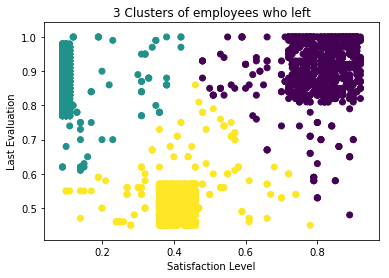

In [18]:
# Add new column "label" annd assign cluster labels.
import matplotlib.pyplot as plt
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'])
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

In [21]:
left_emp['label'].value_counts()

2    1650
0     977
1     944
Name: label, dtype: int64

In [14]:
about_to_leave =  df[['satisfaction_level', 'last_evaluation']][df.left == 0]
clus=kmeans.predict(about_to_leave)
clus

array([2, 0, 2, ..., 0, 2, 2])

In [15]:
about_to_leave['labels']=clus

In [16]:
about_to_leave.head()

,satisfaction_level,last_evaluation,labels
2000,0.58,0.74,2
2001,0.82,0.67,0
2002,0.45,0.69,2
2003,0.78,0.82,0
2004,0.49,0.60,2


In [17]:
about_to_leave['labels'].value_counts()

0    6978
2    3713
1     737
Name: labels, dtype: int64

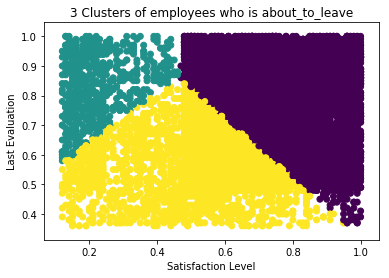

In [19]:
# Draw scatter plot
plt.scatter(about_to_leave['satisfaction_level'], about_to_leave['last_evaluation'], c=about_to_leave['labels'])
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who is about_to_leave')
plt.show()

In [ ]:
#Conclusion: 32 % may leave the organization